# Analysis - BTCD algorithm

Analysis of the btcutils algorithm implemented in btcd

In [1]:
%pylab inline
import pandas as pd
import numpy as np

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib


In [3]:
def preprocess(df):
    df = df.replace(-1.00, np.nan)
    df = df.sort_values(by=['block_number'])
    return df

dfbtcutil = pd.read_csv('data/feeestimation/btcutilscores2019-01-11.csv')
dfbtcutil = preprocess(dfbtcutil)

In [13]:
avg_rateeco = dfbtcutil["priceEconomical"].mean()
std_rateeco = dfbtcutil["priceEconomical"].std()
print("The average economical fee-per-byte-rate is: " + str(avg_rateeco) + " Satoshi per byte. std: " + str(std_rateeco))

avg_ratestandard = dfbtcutil["priceStandard"].mean()
std_ratestandard = dfbtcutil["priceStandard"].std()
print("The average standard fee-per-byte-rate is: " + str(avg_ratestandard) + " Satoshi per byte. std: " + str(std_ratestandard))

avg_ratefast = dfbtcutil["priceFast"].mean()
std_ratefast = dfbtcutil["priceFast"].std()
print("The average standard fee-per-byte-rate is: " + str(avg_ratefast) + " Satoshi per byte. std: " + str(std_ratefast))

The average economical fee-per-byte-rate is: 2.036074074074074 Satoshi per byte. std: 0.660080779843602
The average standard fee-per-byte-rate is: 3.255833333333333 Satoshi per byte. std: 1.2536763861268487
The average standard fee-per-byte-rate is: 16.508 Satoshi per byte. std: 6.099638572651755


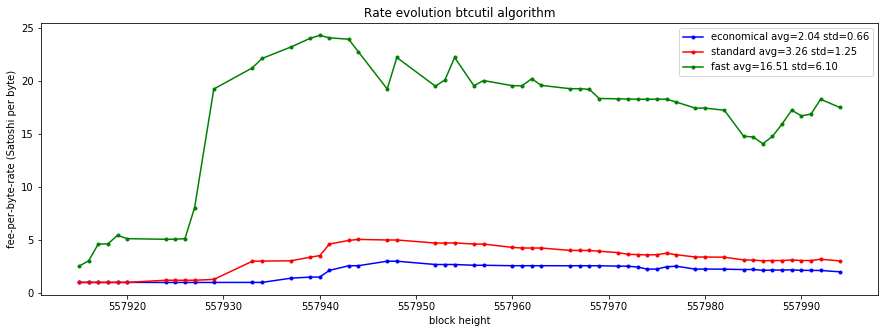

In [16]:
import matplotlib.pyplot as plt

x = dfbtcutil["block_number"].values
y1 = dfbtcutil["priceEconomical"].values
y2 = dfbtcutil["priceStandard"].values
y3 = dfbtcutil["priceFast"].values

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.plot(x,y1, c='b', marker='.', label='economical avg=' +'{:0.2f}'.format(avg_rateeco) + ' std='+'{:0.2f}'.format(std_rateeco))
ax.plot(x,y2, c='r', marker='.', label='standard avg=' +'{:0.2f}'.format(avg_ratestandard) + ' std='+'{:0.2f}'.format(std_ratestandard))
ax.plot(x,y3, c='g',marker='.', label='fast avg=' +'{:0.2f}'.format(avg_ratefast) + ' std='+'{:0.2f}'.format(std_ratefast))



plt.xlabel('block height')
ax.ticklabel_format(useOffset=False)
plt.ylabel('fee-per-byte-rate (Satoshi per byte)')
plt.title('Rate evolution btcutil algorithm')
plt.legend(loc=1)

In [10]:
def getPercentage(cols):
    minScore = dfbtcutil[cols].min(axis=1)
    numberOfBlocks = minScore.count()
    numberOfBlocksWithoutInclusion = minScore[minScore > 95].count()
    if numberOfBlocksWithoutInclusion is None:
        numberOfBlocksWithoutInclusion = 0
    percentage = (100 / numberOfBlocks) * numberOfBlocksWithoutInclusion
    print(percentage)
    return percentage

59.45945945945946
51.35135135135135
18.91891891891892
45.65217391304348
43.47826086956522
13.043478260869565
40.0
40.0
10.0
32.075471698113205
32.075471698113205
9.433962264150944
26.41509433962264
26.41509433962264
7.547169811320755
22.641509433962263
22.641509433962263
5.660377358490566
20.754716981132077
18.867924528301888
3.7735849056603774
18.867924528301888
15.09433962264151
1.8867924528301887
18.867924528301888
15.09433962264151
0.0
18.867924528301888
13.20754716981132
0.0


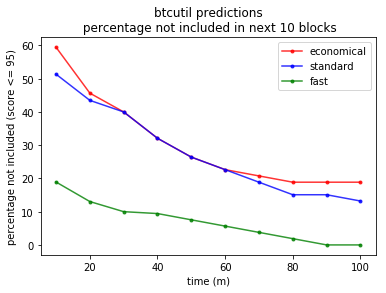

In [12]:
x1 = []
y1 = []
y2 = []
y3 = []
avg_blocktime = 10
colsSlow = []
colsStd = []
colsFast = []
for idx in range(1, 11, 1):
    colsSlow.append("scoreEconomicalPlus" + str(idx))
    colsStd.append("scoreStandardPlus" + str(idx))
    colsFast.append("scoreFastPlus" + str(idx))
    percentage1 = getPercentage(colsSlow)
    y1.append(percentage1)
    percentage2 = getPercentage(colsStd)
    y2.append(percentage2)
    percentage3 = getPercentage(colsFast)
    y3.append(percentage3)
    x1.append(idx * avg_blocktime)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x1, y1, alpha=0.8, c='r', marker='.', label='economical')
ax.plot(x1, y2, alpha=0.8, c='b', marker='.', label='standard')
ax.plot(x1, y3, alpha=0.8, c='g', marker='.', label='fast')
#plt.axvline(x=60.0, color='g', linestyle='--')

plt.xlabel('time (m)')
plt.ylabel('percentage not included (score <= 95)')
plt.title('btcutil predictions\n percentage not included in next 10 blocks')
plt.legend(loc=1)